In [9]:
import os
import json
kaggle_token={"username":"madhumitha2710","key":"e7fa23386c1248a6447ab81934df7b5b"}
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
os.makedirs ('/root/.kaggle',exist_ok=True)
with open("/root/.kaggle/kaggle.json", 'w') as file:
  json.dump(kaggle_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sizlingdhairya1/skin-cancer

Dataset URL: https://www.kaggle.com/datasets/sizlingdhairya1/skin-cancer
License(s): unknown
  0% 0.00/11.2M [00:00<?, ?B/s]
100% 11.2M/11.2M [00:00<00:00, 397MB/s]


In [5]:
import zipfile
with zipfile.ZipFile("/content/skin-cancer.zip", 'r') as zip_ref:
  zip_ref.extractall("cancer")
  print("Dataset unzipped")

Dataset unzipped


In [7]:
cancer_classes = os.listdir("/content/cancer/Datasets")
print("classes:", cancer_classes)

classes: ['Superficial', 'Nodular', 'Acral', 'Lentingo']


In [11]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory('/content/cancer/Datasets',
      target_size=(IMG_SIZE, IMG_SIZE),
      batch_size=BATCH_SIZE,
      class_mode='categorical',
      subset='training')
val_generator = train_datagen.flow_from_directory('/content/cancer/Datasets',
      target_size=(IMG_SIZE, IMG_SIZE),
      batch_size=BATCH_SIZE,
      class_mode='categorical',
      subset='validation')

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [13]:
class_names=list(train_generator.class_indices.keys())
print(train_generator.class_indices)
print(class_names)

{'Acral': 0, 'Lentingo': 1, 'Nodular': 2, 'Superficial': 3}
['Acral', 'Lentingo', 'Nodular', 'Superficial']


In [14]:
model = keras.Sequential([
     layers.Conv2D(32, (3, 3), activation='relu',
     input_shape=(IMG_SIZE, IMG_SIZE, 3)),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(64, (3, 3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(128, (3, 3), activation='relu'),
     layers.MaxPooling2D((2, 2)), layers.Flatten(),
     layers.Dense(128, activation='relu'),
     layers.Dense(4, activation='softmax') ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(train_generator,epochs=3,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.2844 - loss: 3.6392 - val_accuracy: 0.5000 - val_loss: 1.1339
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.5625 - loss: 1.0622 - val_accuracy: 0.6500 - val_loss: 0.8526
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7128 - loss: 0.7912 - val_accuracy: 0.6500 - val_loss: 0.7484


In [17]:
model.save('/content/cancer/Datasets/data.h5')

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/cancer/Datasets/data.h5")
print('Model Loaded')

Model Loaded


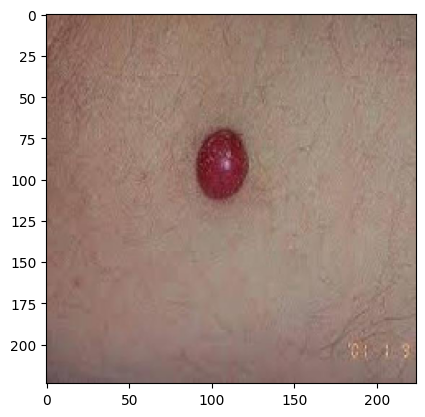

In [22]:
test_image_path="/content/cancer/Datasets/Nodular/1 - Copy (2).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [23]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255

In [24]:
prediction = model.predict(img_array)
ind=np.argmax(prediction)
prediction=prediction[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


In [25]:
inv_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = inv_labels[ind]
print(" Predicted class:", predicted_class)

 Predicted class: Lentingo


In [27]:
if predicted_class == "NonDemented":
  print("No Skin Cancer Detected")
else:
  print(f" Skin Cancer stage detected: {predicted_class}")

 Skin Cancer stage detected: Lentingo
